In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
def read_metrics_csv(dataset, method):
    df = pd.read_csv(f"results/{dataset}/{method}_metrics.csv")
    runs = [group for _, group in df.groupby("run_id")]
    return runs


In [7]:
def read_summaries(dataset, method, stage):
    df = pd.read_csv(f"results/{dataset}/{stage}/{method}_summaries.csv")
    summaries = [group for _, group in df.groupby("run_id")]
    return summaries



In [8]:
def read_summaries(dataset, method, stage):
    file_path = f"results/{dataset}/{stage}/{method}_summaries.csv"
    if os.path.getsize(file_path) > 0:  # Check if file is not empty
        df = pd.read_csv(file_path)
        df["method"] = method  # Add a column to indicate the method
        df["dataset"] = dataset  # Add a column to indicate the dataset
        return df
    else:
        print(f"File {file_path} is empty.")
        return pd.DataFrame()  # Return an empty DataFrame

# List of methods
methods = ["regular", "regular-decorr", "vibcreg", "vibcreg-decorr", "barlowtwins", "barlowtwins-decorr", "byol", "byol-decorr"]

datasets = [
    "ElectricDevices",
    "StarLightCurves",
    "Wafer",
    "ECG5000",
    "TwoPatterns",
    "FordA",
    "UWaveGestureLibraryAll",
    "FordB",
    "ChlorineConcentration",
    "ShapesAll",
]

# Read the summaries for all methods and all datasets into a single DataFrame
all_summaries_stage1 = pd.concat([read_summaries(dataset, method, "stage1") for dataset in datasets for method in methods])
all_summaries_stage2 = pd.concat([read_summaries(dataset, method, "stage2") for dataset in datasets for method in methods])

/tmp/ipykernel_137775/2585237460.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/2585237460.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/2585237460.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/2585237460.py:18: UserWarning: set_ticklabels() should only be used with

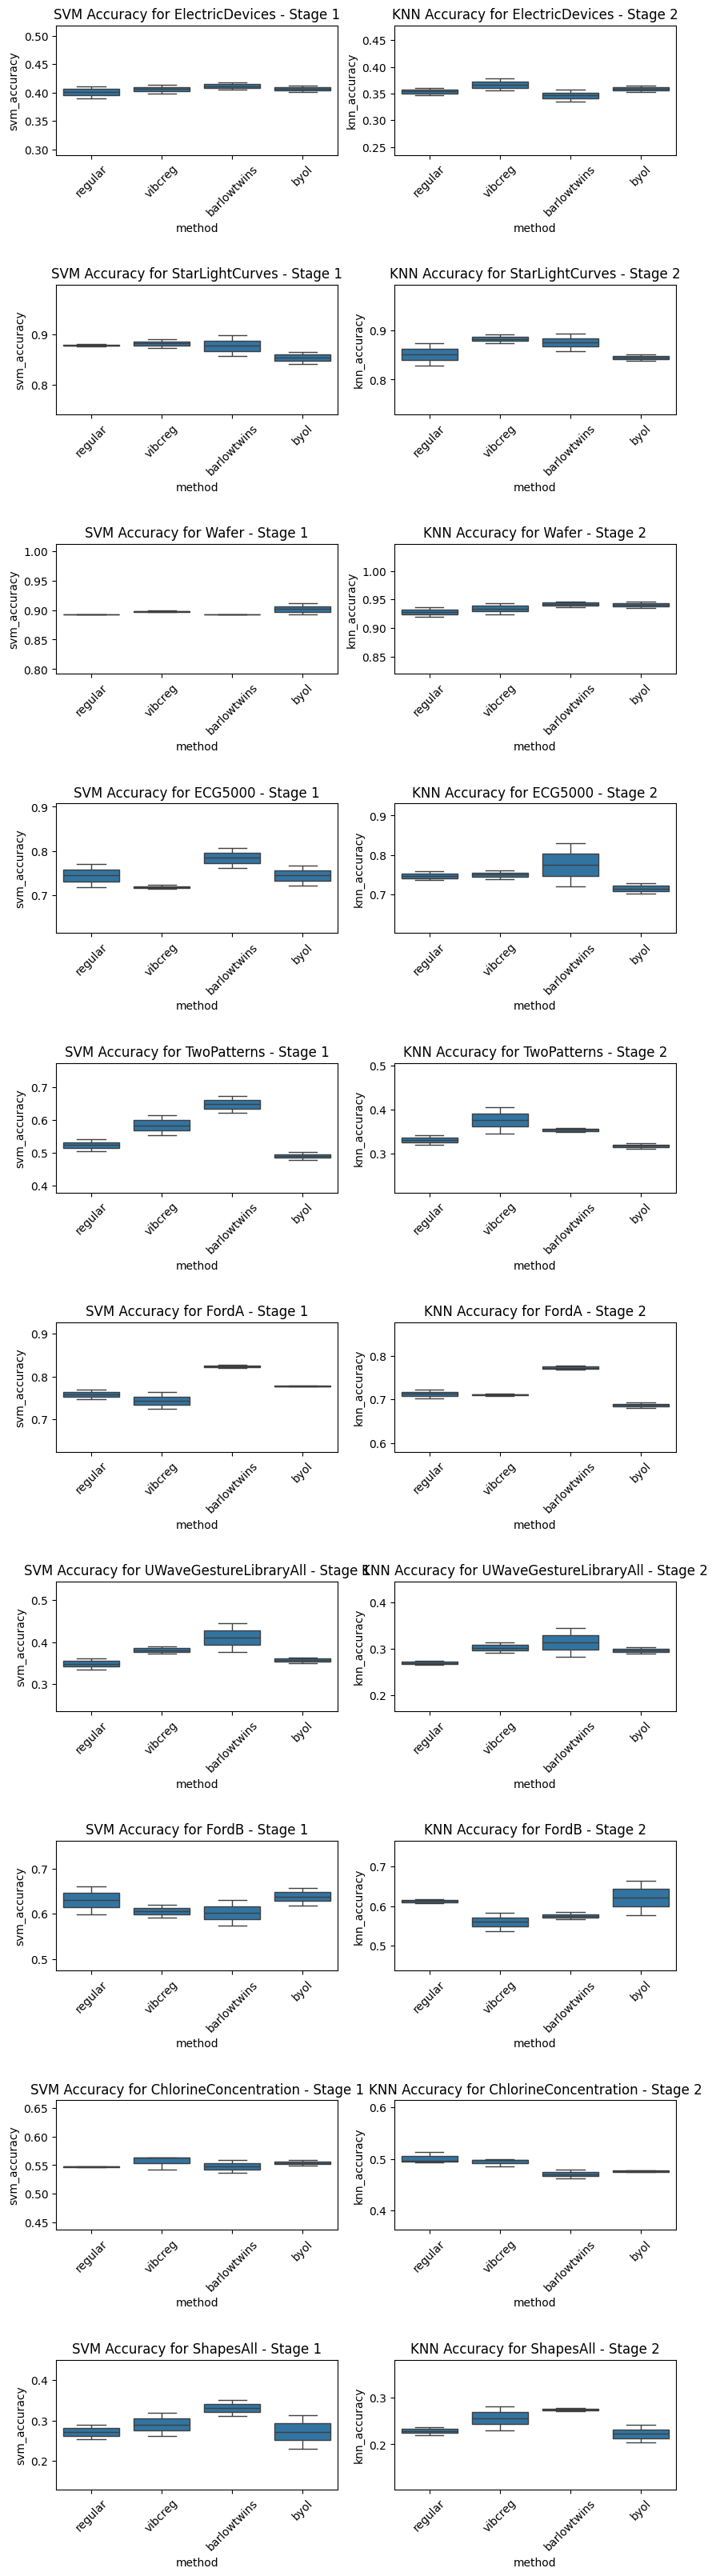

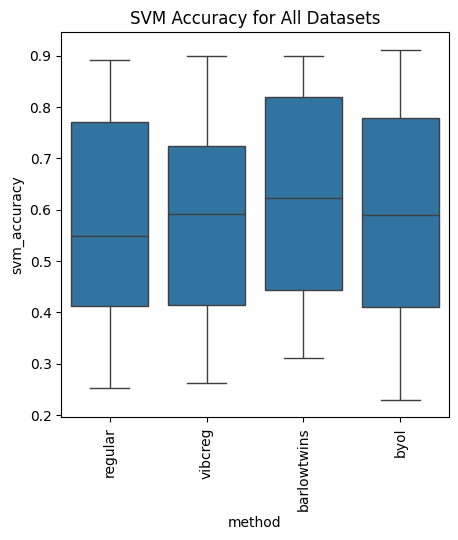

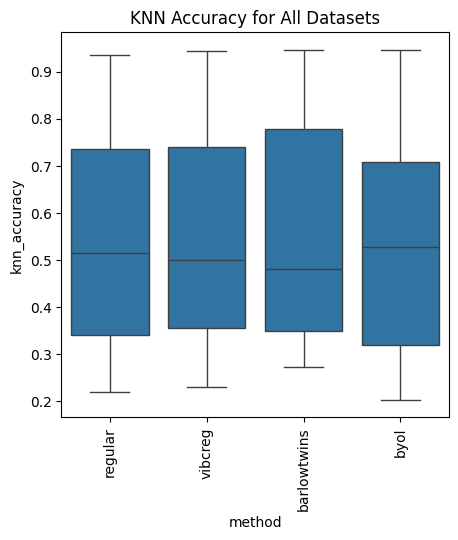

In [25]:
methods = ["regular", "byol", "barlowtwins", "vibcreg"]  # Replace with your actual methods

f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
for dataset in datasets:
    data_svm = all_summaries_stage1[(all_summaries_stage1["dataset"] == dataset) & (all_summaries_stage1["method"].isin(methods))]
    data_knn = all_summaries_stage1[(all_summaries_stage1["dataset"] == dataset) & (all_summaries_stage1["method"].isin(methods))]
    
    min_svm, max_svm = data_svm['svm_accuracy'].min(), data_svm['svm_accuracy'].max()
    min_knn, max_knn = data_knn['knn_accuracy'].min(), data_knn['knn_accuracy'].max()

    sns.boxplot(x="method", y="svm_accuracy", data=data_svm, ax=a[datasets.index(dataset)][0])
    a[datasets.index(dataset)][0].set_title(f"SVM Accuracy for {dataset} - Stage 1")
    a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][0].set_ylim(min_svm - 0.1, max_svm + 0.1)  # Adjust y-axis limits

    sns.boxplot(x="method", y="knn_accuracy", data=data_knn, ax=a[datasets.index(dataset)][1])
    a[datasets.index(dataset)][1].set_title(f"KNN Accuracy for {dataset} - Stage 2")
    a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][1].set_ylim(min_knn - 0.1, max_knn + 0.1)  # Adjust y-axis limits

plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
plt.savefig('results/boxplot.png', dpi = 300)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="svm_accuracy", data=all_summaries_stage1[all_summaries_stage1["method"].isin(methods)])
plt.title("SVM Accuracy for All Datasets")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="knn_accuracy", data=all_summaries_stage1[all_summaries_stage1["method"].isin(methods)])
plt.title("KNN Accuracy for All Datasets")
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_137775/1502307342.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/1502307342.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/1502307342.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/1502307342.py:16: UserWarning: set_ticklabels() should only be used with

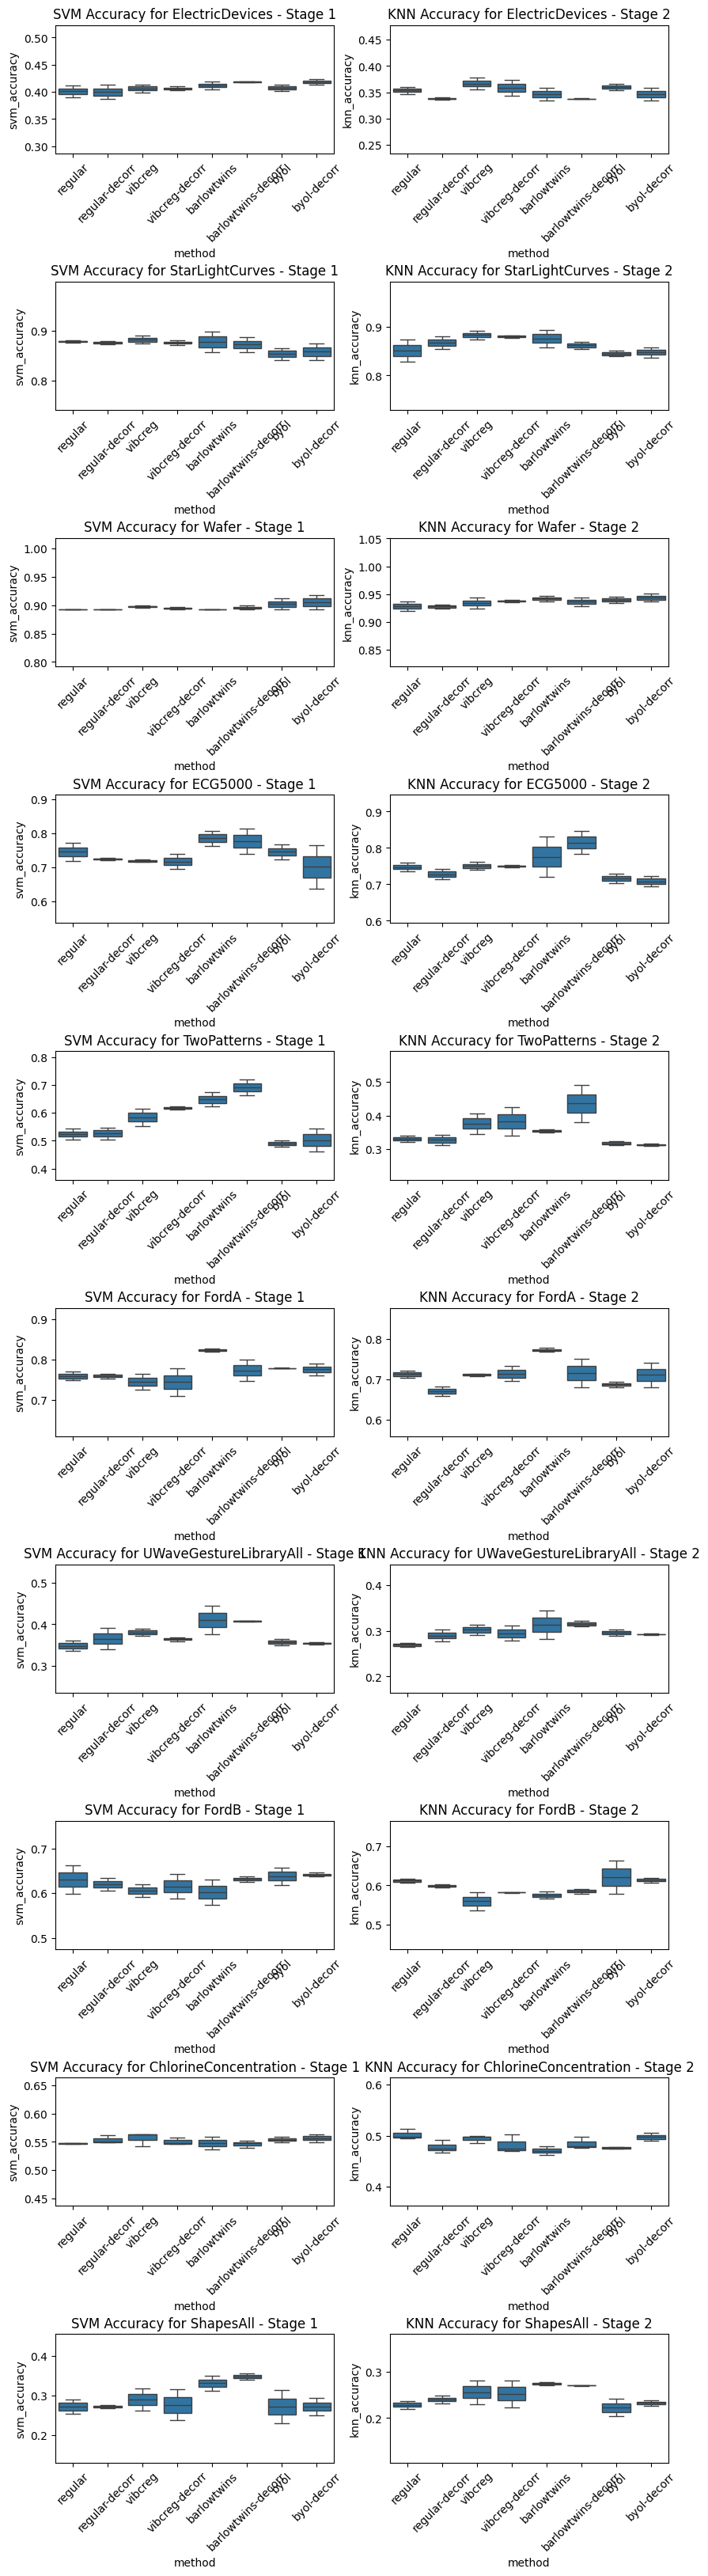

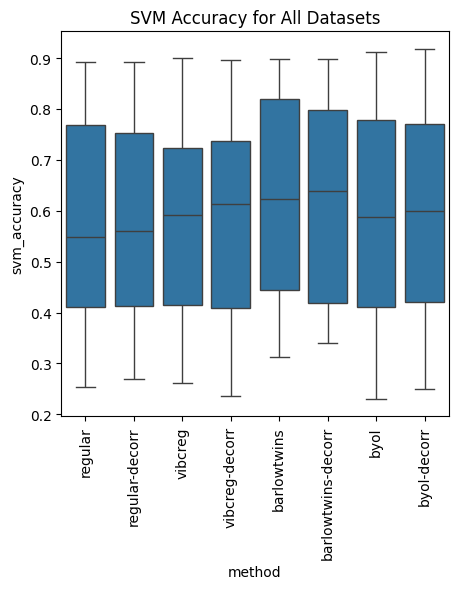

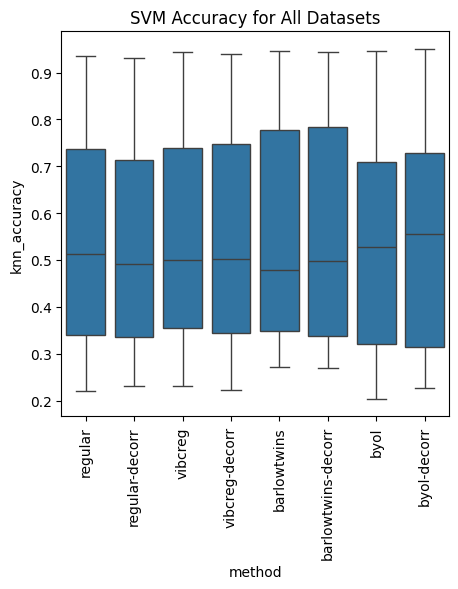

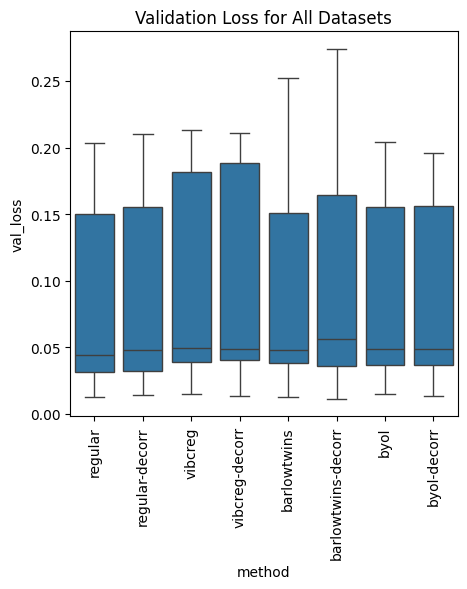

In [27]:
f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
for dataset in datasets:
    data_svm = all_summaries_stage1[all_summaries_stage1["dataset"] == dataset]
    data_knn = all_summaries_stage1[all_summaries_stage1["dataset"] == dataset]
    min_svm, max_svm = data_svm['svm_accuracy'].min(), data_svm['svm_accuracy'].max()
    min_knn, max_knn = data_knn['knn_accuracy'].min(), data_knn['knn_accuracy'].max()

    sns.boxplot(x="method", y="svm_accuracy", data=all_summaries_stage1[all_summaries_stage1["dataset"] == dataset], ax=a[datasets.index(dataset)][0])
    a[datasets.index(dataset)][0].set_title(f"SVM Accuracy for {dataset} - Stage 1")
    a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][0].set_ylim(min_svm - 0.1, max_svm + 0.1)  # Adjust y-axis limits

    
    sns.boxplot(x="method", y="knn_accuracy", data=all_summaries_stage1[all_summaries_stage1["dataset"] == dataset], ax=a[datasets.index(dataset)][1])
    a[datasets.index(dataset)][1].set_title(f"KNN Accuracy for {dataset} - Stage 2")
    a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][1].set_ylim(min_knn - 0.1, max_knn + 0.1)  # Adjust y-axis limits

plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
plt.savefig('results/boxplot.png', dpi = 300)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="svm_accuracy", data=all_summaries_stage1)
plt.title("SVM Accuracy for All Datasets")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="knn_accuracy", data=all_summaries_stage1)
plt.title("SVM Accuracy for All Datasets")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="val_loss", data=all_summaries_stage1)
plt.title("Validation Loss for All Datasets")
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_137775/1225494271.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/1225494271.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/1225494271.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/1225494271.py:16: UserWarning: set_ticklabels() should only be used with

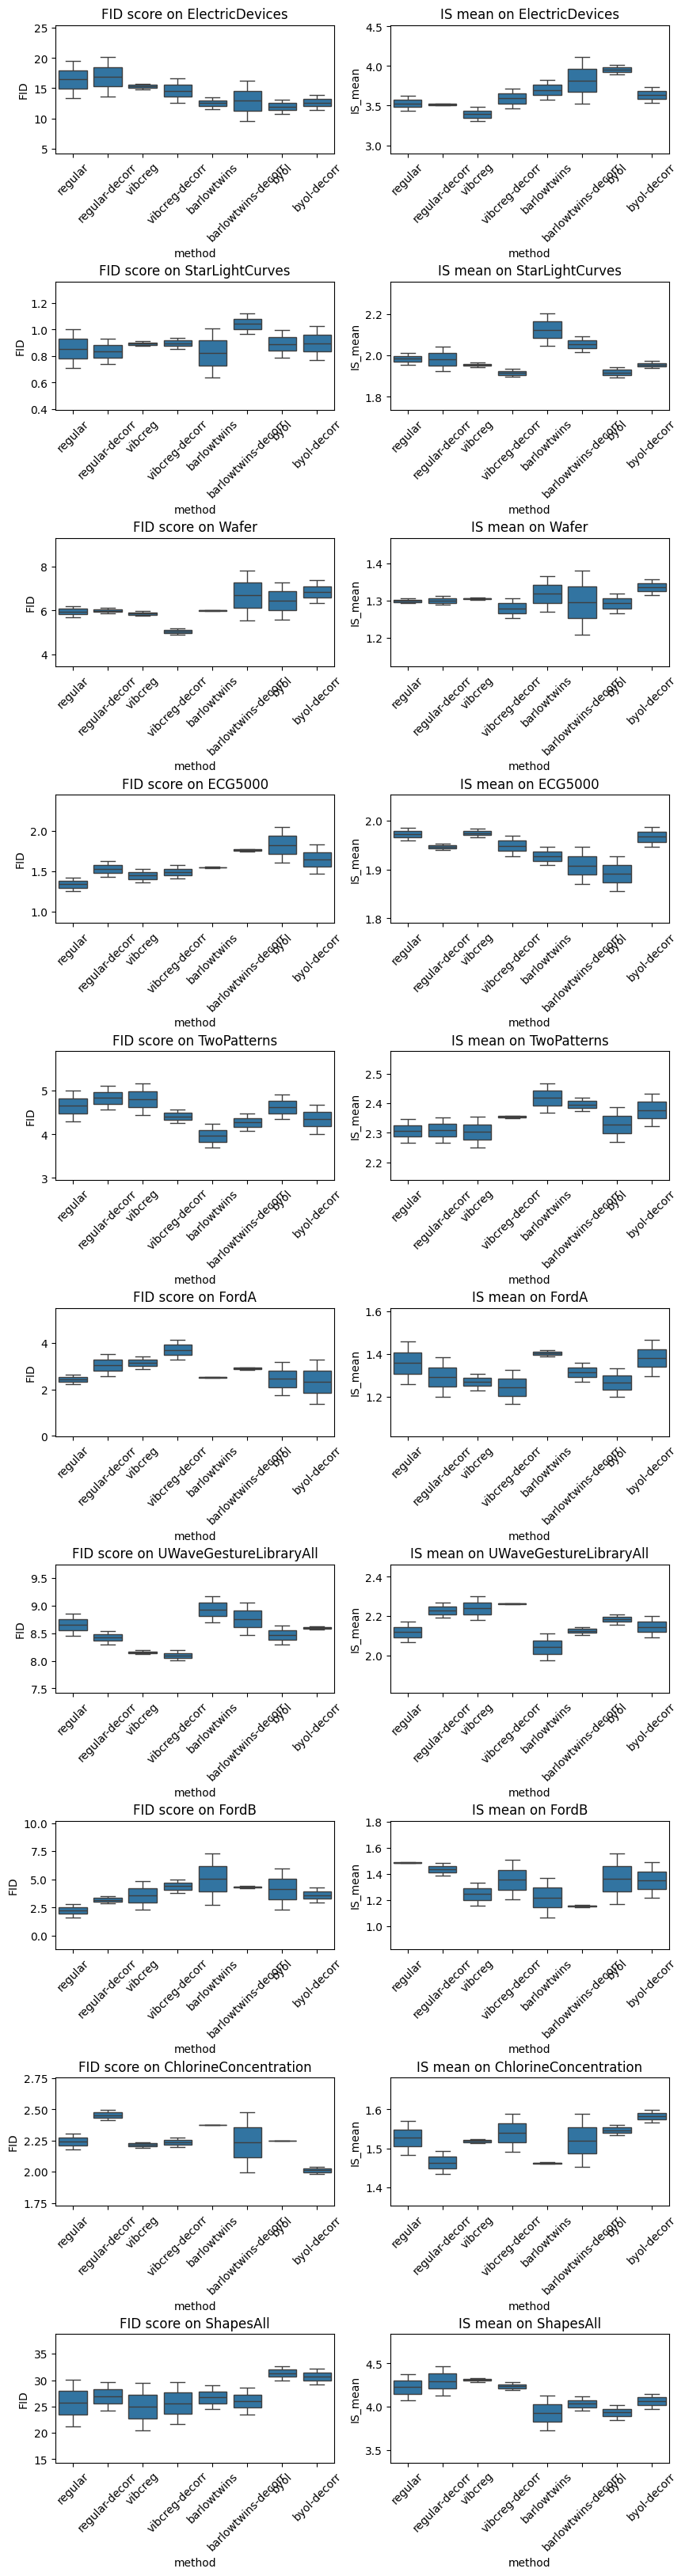

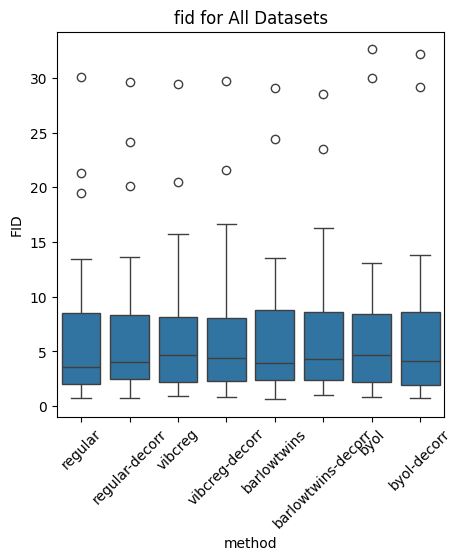

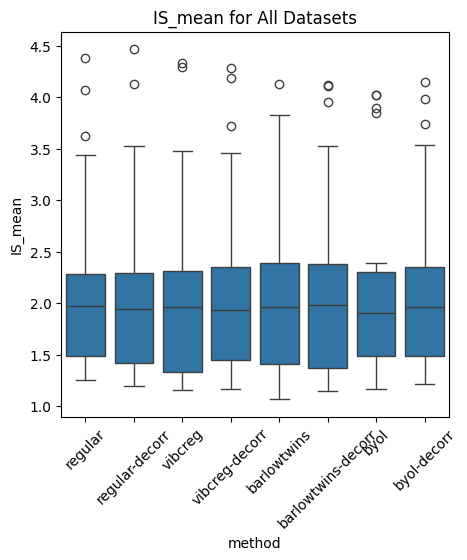

In [28]:
f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
for dataset in datasets:
    data_fid = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
    data_is = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
    
    min_fid, max_fid = data_fid['FID'].min(), data_fid['FID'].max()
    min_is, max_is = data_is['IS_mean'].min(), data_is['IS_mean'].max()
    
    sns.boxplot(x="method", y="FID", data=data_fid, ax=a[datasets.index(dataset)][0])
    a[datasets.index(dataset)][0].set_title(f"FID score on {dataset}")
    a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][0].set_ylim(min_fid - 0.5 * (max_fid - min_fid), max_fid + 0.5 * (max_fid - min_fid))  # Adjust y-axis limits

    sns.boxplot(x="method", y="IS_mean", data=data_is, ax=a[datasets.index(dataset)][1])
    a[datasets.index(dataset)][1].set_title(f"IS mean on {dataset}")
    a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][1].set_ylim(min_is - 0.5 * (max_is - min_is), max_is + 0.5 * (max_is - min_is))  # Adjust y-axis limits

plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
plt.savefig('results/boxplot2.png', dpi = 300)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="FID", data=all_summaries_stage2)
plt.title("fid for All Datasets")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="IS_mean", data=all_summaries_stage2)
plt.title("IS_mean for All Datasets")
plt.xticks(rotation=45)
plt.show()

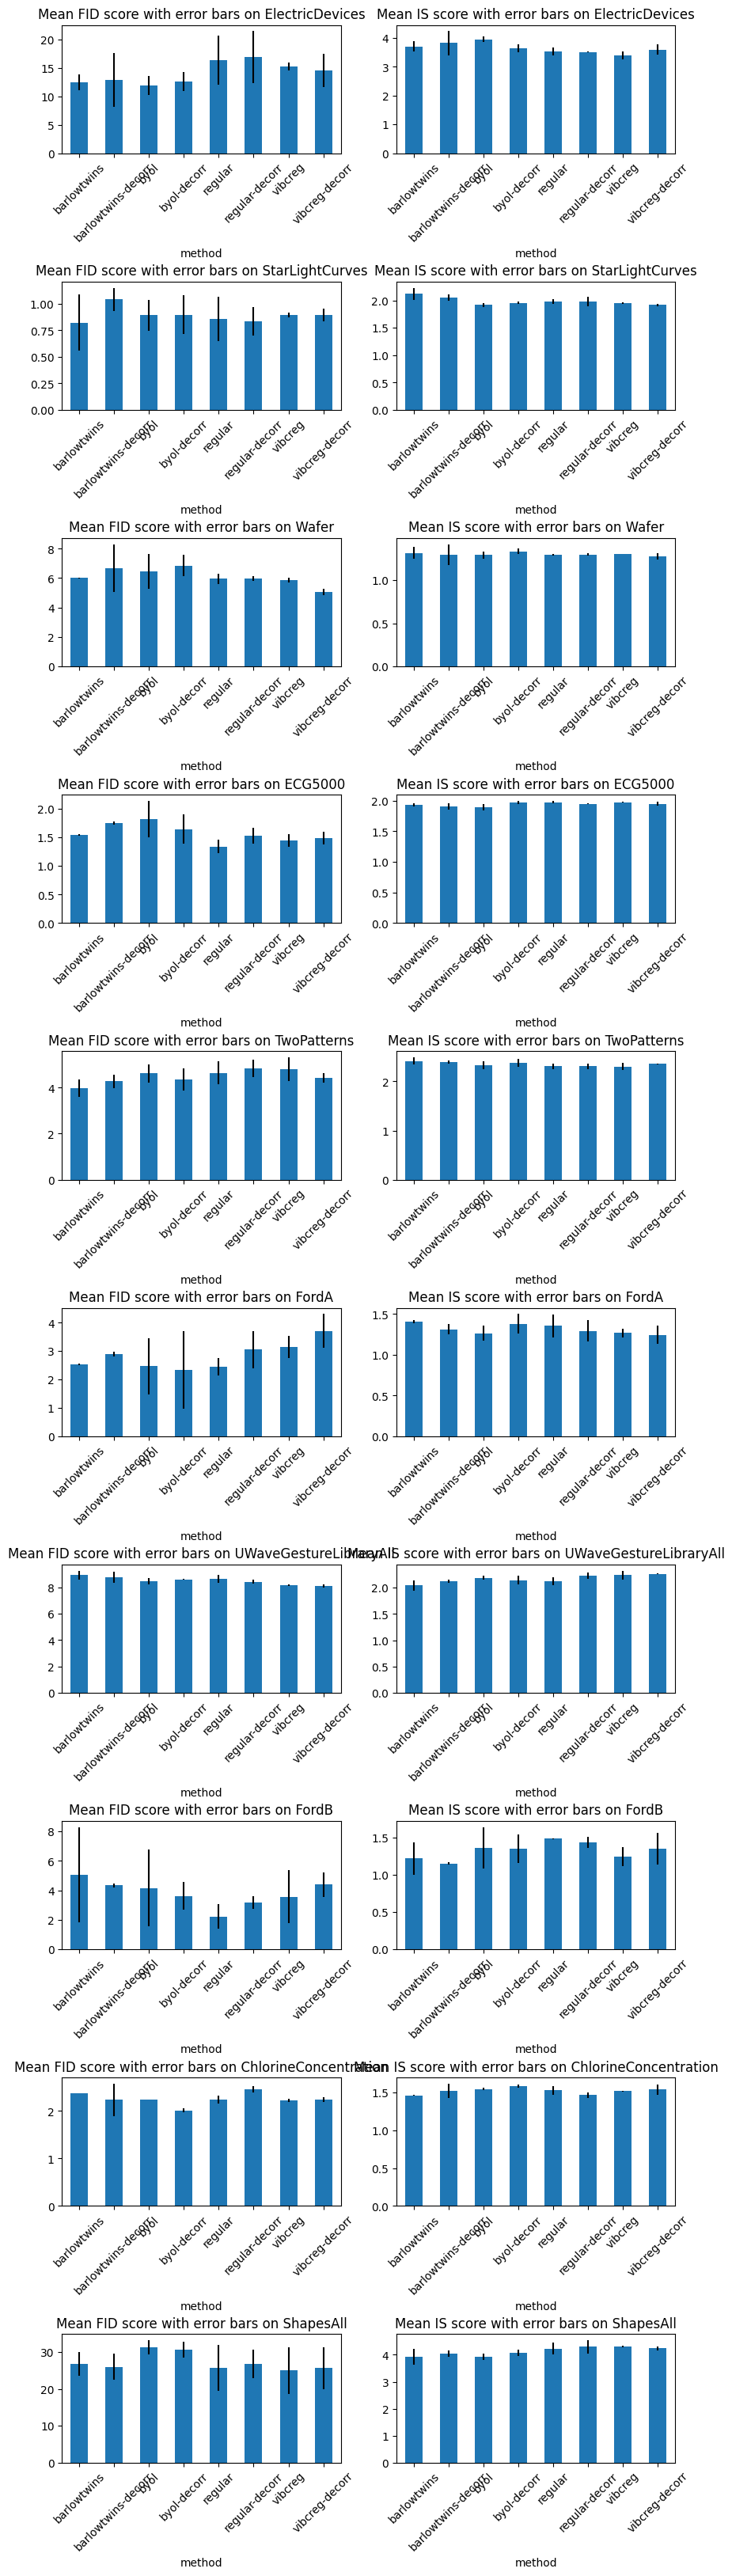

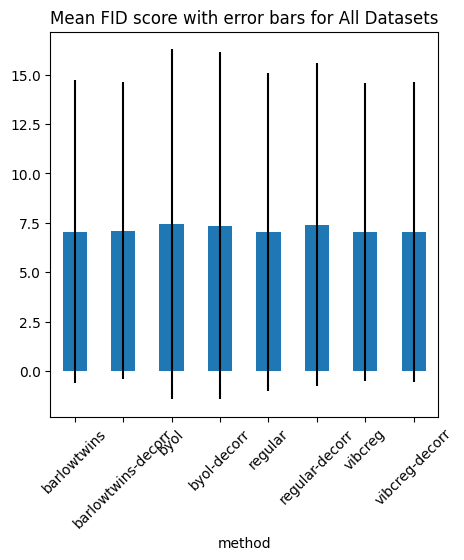

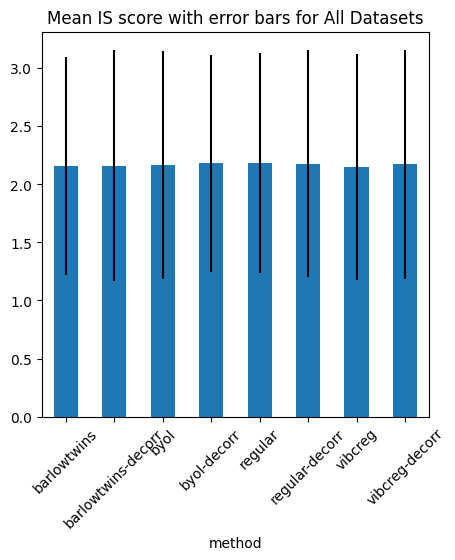

In [16]:
f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
for dataset in datasets:
    data_fid = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
    data_is = all_summaries_stage2[all_summaries_stage2["dataset"] == dataset]
    
    data_fid.groupby('method')['FID'].mean().plot(kind='bar', yerr=data_fid.groupby('method')['FID'].std(), ax=a[datasets.index(dataset)][0])
    a[datasets.index(dataset)][0].set_title(f"Mean FID score with error bars on {dataset}")
    a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels

    data_is.groupby('method')['IS_mean'].mean().plot(kind='bar', yerr=data_is.groupby('method')['IS_mean'].std(), ax=a[datasets.index(dataset)][1])
    a[datasets.index(dataset)][1].set_title(f"Mean IS score with error bars on {dataset}")
    a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
plt.show()

plt.figure(figsize=(5, 5))
all_summaries_stage2.groupby('method')['FID'].mean().plot(kind='bar', yerr=all_summaries_stage2.groupby('method')['FID'].std())
plt.title("Mean FID score with error bars for All Datasets")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 5))
all_summaries_stage2.groupby('method')['IS_mean'].mean().plot(kind='bar', yerr=all_summaries_stage2.groupby('method')['IS_mean'].std())
plt.title("Mean IS score with error bars for All Datasets")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_137775/2139488463.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/2139488463.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/2139488463.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
/tmp/ipykernel_137775/2139488463.py:18: UserWarning: set_ticklabels() should only be used with

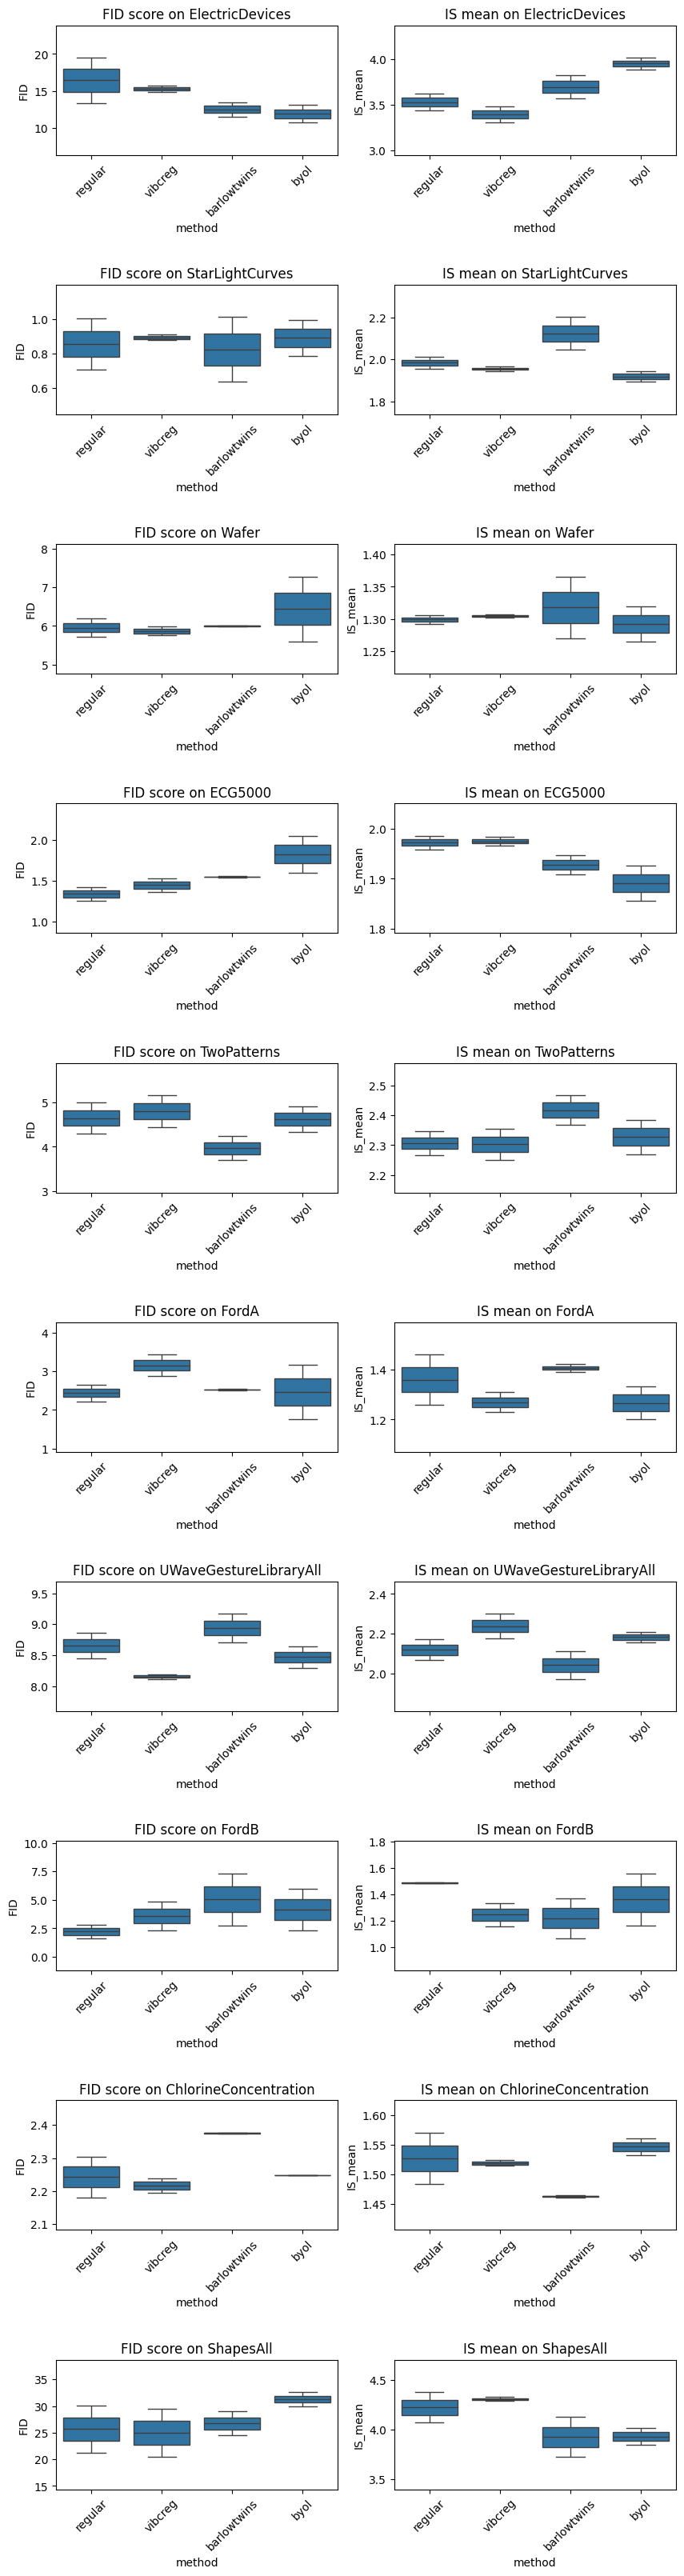

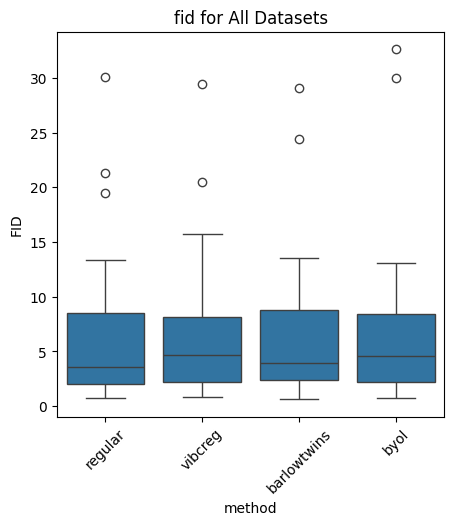

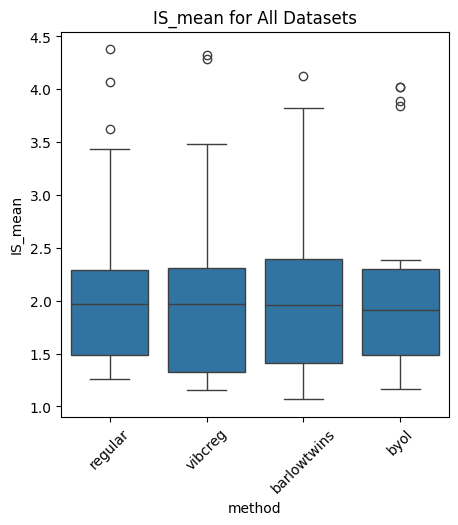

In [26]:
methods = ['regular', 'byol', 'barlowtwins', 'vibcreg']  # Replace with your actual methods

f, a = plt.subplots(len(datasets), 2, figsize=(10, 40))
for dataset in datasets:
    data_fid = all_summaries_stage2[(all_summaries_stage2["dataset"] == dataset) & (all_summaries_stage2["method"].isin(methods))]
    data_is = all_summaries_stage2[(all_summaries_stage2["dataset"] == dataset) & (all_summaries_stage2["method"].isin(methods))]
    
    min_fid, max_fid = data_fid['FID'].min(), data_fid['FID'].max()
    min_is, max_is = data_is['IS_mean'].min(), data_is['IS_mean'].max()
    
    sns.boxplot(x="method", y="FID", data=data_fid, ax=a[datasets.index(dataset)][0])
    a[datasets.index(dataset)][0].set_title(f"FID score on {dataset}")
    a[datasets.index(dataset)][0].set_xticklabels(a[datasets.index(dataset)][0].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][0].set_ylim(min_fid - 0.5 * (max_fid - min_fid), max_fid + 0.5 * (max_fid - min_fid))  # Adjust y-axis limits

    sns.boxplot(x="method", y="IS_mean", data=data_is, ax=a[datasets.index(dataset)][1])
    a[datasets.index(dataset)][1].set_title(f"IS mean on {dataset}")
    a[datasets.index(dataset)][1].set_xticklabels(a[datasets.index(dataset)][1].get_xticklabels(), rotation=45)  # Rotate x-axis labels
    a[datasets.index(dataset)][1].set_ylim(min_is - 0.5 * (max_is - min_is), max_is + 0.5 * (max_is - min_is))  # Adjust y-axis limits

plt.subplots_adjust(hspace = 1)  # Add more vertical spacing between subplots
plt.savefig('results/boxplot2.png', dpi = 300)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="FID", data=all_summaries_stage2[all_summaries_stage2["method"].isin(methods)])
plt.title("fid for All Datasets")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(x="method", y="IS_mean", data=all_summaries_stage2[all_summaries_stage2["method"].isin(methods)])
plt.title("IS_mean for All Datasets")
plt.xticks(rotation=45)
plt.show()